# Personnaliser sa carte

Considérons la carte suivante :

<Axes: >

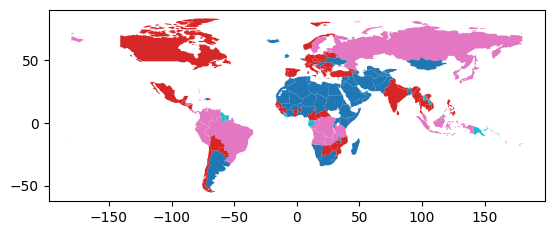

In [18]:
# chargement des bibliothèques
import geopandas
import pandas 
# chargement des données
données = pandas.read_csv('data/EXEMPLE_1.csv')
# chargement de la carte
fond_carte = geopandas.read_file("cartes/MONDE.shp")
# mise en classe sur une colonne
données["2022_af"] = pandas.cut( données["2022"], bins=4 )
# jointure fond de carte avec les données
carte = fond_carte.merge(données, how="left", left_on="SOV_A3", right_on="Country Code")
# affichage de la carte
carte.plot(
    column="2022_af"
)

La carte est générée avec la **palette de couleurs** standard, aucune autre information ne s'affiche !\
Voyant maintenant comment personnaliser cette carte en : 
- affichant une légende
- changer la palette de couleurs
- définir une couleur pour les pays sans données
- personnaliser la légende
- changer la taille de la carte
- retirer les axes
- ajouter un titre

### Afficher la légende 
Il suffit juste de rajouter l'argument `legend=True` à la fonction `plot()`.\
**Attention ! Ne pas oublier la virgule après le 1er argument !**\
Bien évidemment, vous êtes libres de définir vos propres étiquettes lors de la mise en classe !

<Axes: >

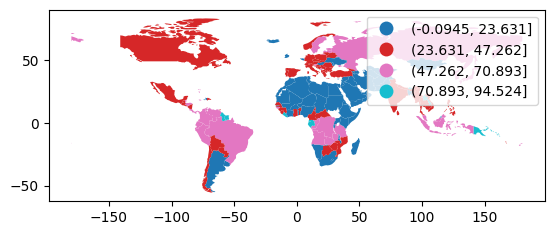

In [19]:
carte.plot(
    column="2022_af",
    legend=True
)

### Changer la palette de couleurs
Il faut cette fois ajouter l'argument `cmap=` suivi du nom du jeu de couleur, par exemple : viridis, viridis_r, plasma, plasma_r, Blues, cool, YlGn...\
Plus de choix [ici](https://matplotlib.org/stable/users/explain/colors/colormaps.html)\
Attention ! À nouveau, ne pas oublier la virgule après l'argument précédent !

<Axes: >

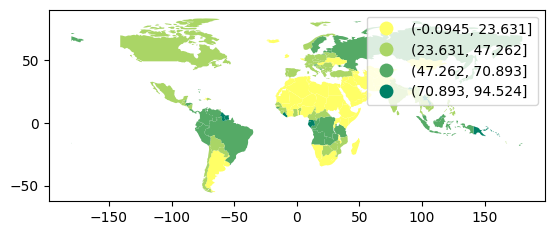

In [20]:
carte.plot(
    column="2022_af",
    legend=True, 
    cmap='summer_r'
)

### Définir une couleur pour les pays sans données
Il faut cette fois ajouter l'argument `missing_kwds=` suivi de crochets qui contiendront d'autres arguments :
- `'color:'`, suivi du nom de la [couleur HTML de votre choix](https://www.w3schools.com/colors/colors_names.asp)
- `label:`, suivi du nom de l'étiquette pour les pays sans données

<Axes: >

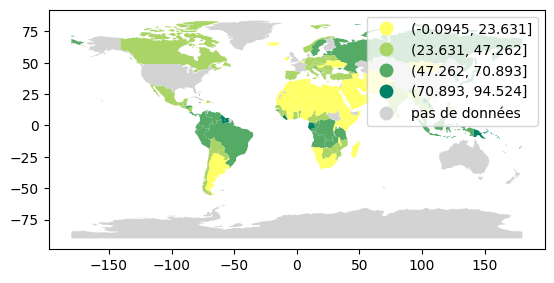

In [21]:
carte.plot(
    column="2022_af",
    legend=True, 
    cmap='summer_r',
    missing_kwds={
        'color':'lightgray',
        'label':'pas de données'
    }
)

### Personnaliser la légende
Personnalisez la légende avec `legend_kwds=`, suivi de crochets qui contiendront un argument :
- `'loc:'`, suivi de 'upper' ou 'lower' et 'left' ou 'right' pour la placer en haut/en bas/à gauche/à droite

<Axes: >

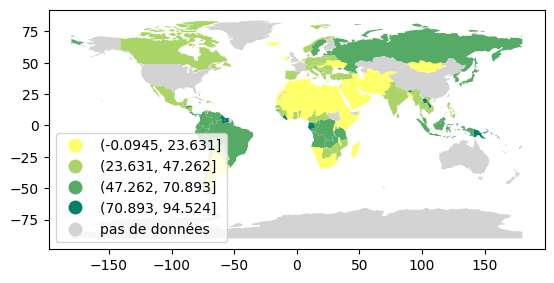

In [22]:
carte.plot(
    column="2022_af",
    legend=True, 
    cmap='summer_r',
    missing_kwds={
        'color':'lightgray',
        'label':'pas de données'
    }, 
    legend_kwds={
        'loc': 'lower left'
    }
)

### Changer la taille de la carte
Il faut ranjouter l'argument `figsize=` suivi de la taille de la carte entre paranthèses, à savoir largeur et hauteur, exprimées en pouces...

<Axes: >

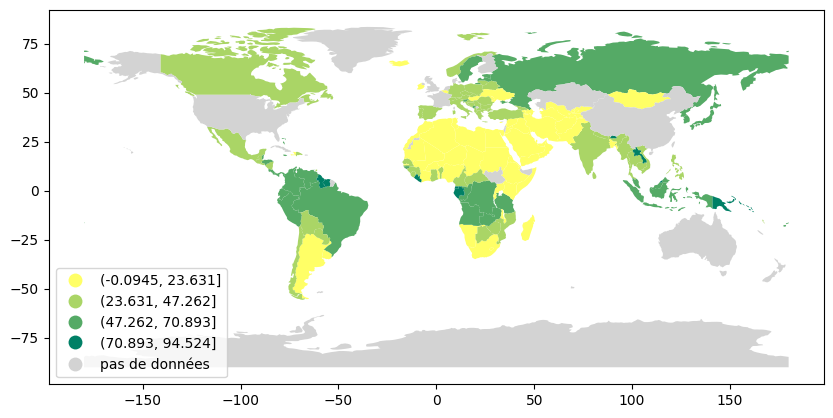

In [23]:
carte.plot(
    column="2022_af",
    legend=True, 
    cmap='summer_r',
    missing_kwds={
        'color':'lightgray',
        'label':'pas de données'
    }, 
    legend_kwds={
        'loc': 'lower left'
    },
    figsize=(10, 6)
)

### Retirer les axes
Pour retirer les axes il faut :
- stocker la carte générée par `plot()` dans une variable
- appeler la fonction `set_axis_off()` sur cette nouvelle variable

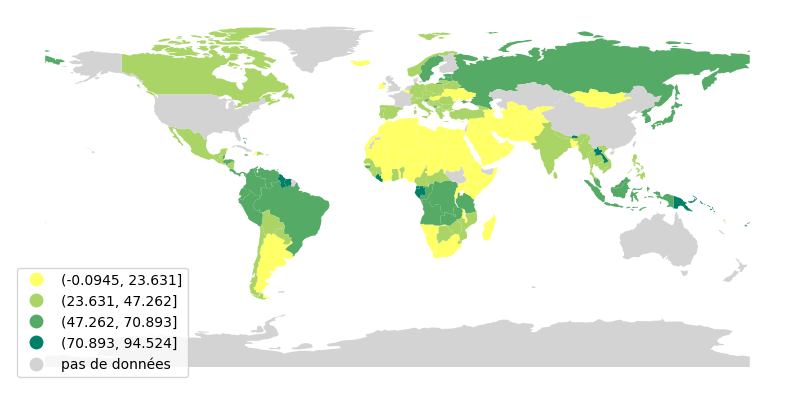

In [24]:
ma_carte = carte.plot(
    column="2022_af",
    legend=True, 
    cmap='summer_r',
    missing_kwds={
        'color':'lightgray',
        'label':'pas de données'
    }, 
    legend_kwds={
        'loc': 'lower left'
    },
    figsize=(10, 6)
)
ma_carte.set_axis_off()

### Ajouter un titre
Pour retirer ajouter un titre, il faut appeler la fonction `set_title()` sur la nouvelle variable et passer en paramètre le titre de votre carte.

Text(0.5, 1.0, 'Surface forestière (%\xa0du territoire)')

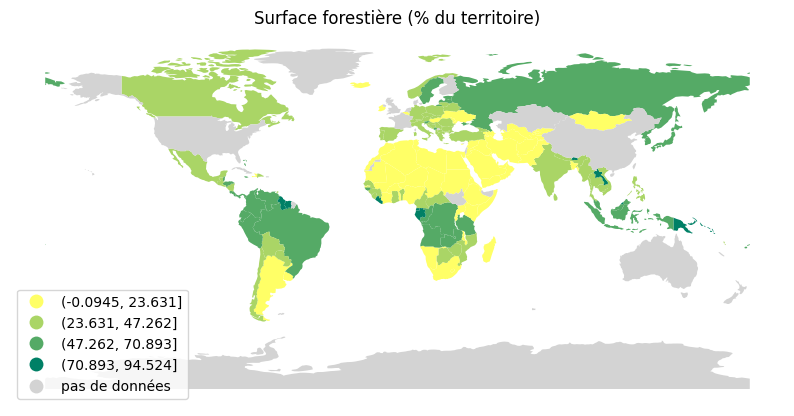

In [25]:
ma_carte = carte.plot(
    column="2022_af",
    legend=True, 
    cmap='summer_r',
    missing_kwds={
        'color':'lightgray',
        'label':'pas de données'
    }, 
    legend_kwds={
        'loc': 'lower left'
    },
    figsize=(10, 6)
)
ma_carte.set_axis_off()
ma_carte.set_title("Surface forestière (% du territoire)")

## Pour aller plus loin
Pour ceux qui le désirent, voici comment : 
- zoomer sur une zone de la carte
- changer la couleur de fond

### Zoomer sur une zone de la carte
Il faut définir les limites avec `set_xlim(x min, y max)` et `set_ylim(y min,y max)` 

(-40.0, 43.64513000000001)

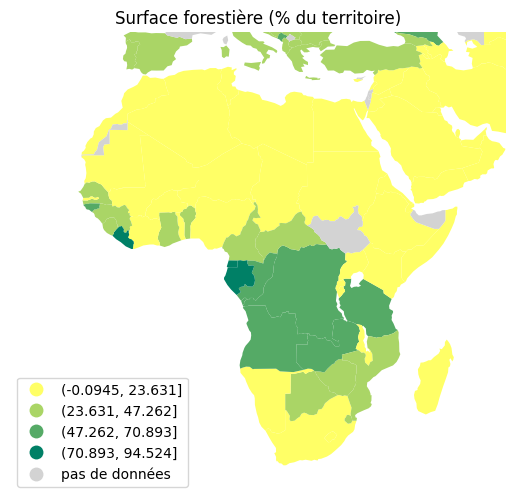

In [26]:
ma_carte = carte.plot(
    column="2022_af",
    legend=True, 
    cmap='summer_r',
    missing_kwds={
        'color':'lightgray',
        'label':'pas de données'
    }, 
    legend_kwds={
        'loc': 'lower left'
    },
    figsize=(10, 6)
)
ma_carte.set_axis_off()
ma_carte.set_title("Surface forestière (% du territoire)")
# on récupère les limites actuelles
minx, miny, maxx, maxy = carte.total_bounds
# on modifie les limites
ma_carte.set_xlim(minx+150, maxx-120)
ma_carte.set_ylim(miny+50, maxy-40)

### Changer la couleur de fond
- importer matplotlib.pyplot
- initialiser un objet "figure" et "axes"
- définir les couleurs de fond
- rajouter l'argument `ax=ax` dans la fonction plot

(-40.0, 43.64513000000001)

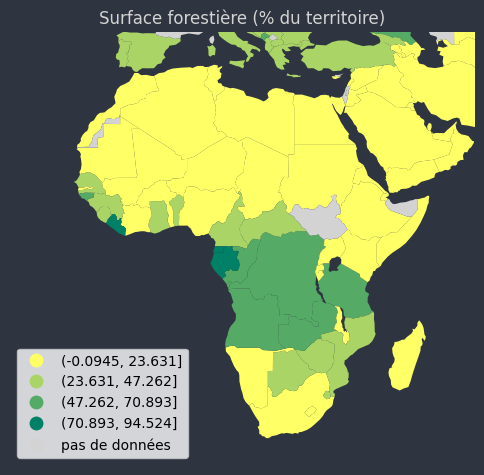

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6, 10))
ax.set_facecolor('#2e3440') # Couleur de fond de la carte
fig.patch.set_facecolor('#2e3440')  # Couleur de fond de l'image


ma_carte = carte.plot(
    ax=ax, # NE PAS OUBLIER
    column="2022_af",
    legend=True, 
    cmap='summer_r',
    missing_kwds={
        'color':'lightgray',
        'label':'pas de données'
    }, 
    legend_kwds={
        'loc': 'lower left'
    },
    figsize=(6, 10)
)
ma_carte.set_axis_off()
ma_carte.set_title("Surface forestière (% du territoire)", color="lightgrey")
# on récupère les limites actuelles
minx, miny, maxx, maxy = carte.total_bounds
# on modifie les limites
ma_carte.set_xlim(minx+150, maxx-120)
ma_carte.set_ylim(miny+50, maxy-40)

### Indiquer la source sur la carte
- importer matplotlib.pyplot
- appeler la fonction `plt.text()` et renseigner les arguments à votre convenance
- modifier l'argument `transform=` si besoin avec le nom de votre carte

Text(0.99, 0.01, 'Source: Banque Mondiale (2023)')

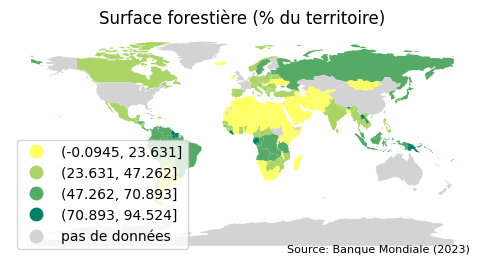

In [35]:
import matplotlib.pyplot as plt

ma_carte = carte.plot(
    column="2022_af",
    legend=True, 
    cmap='summer_r',
    missing_kwds={
        'color':'lightgray',
        'label':'pas de données'
    }, 
    legend_kwds={
        'loc': 'lower left'
    },
    figsize=(6, 10)
)
ma_carte.set_axis_off()
ma_carte.set_title("Surface forestière (% du territoire)", color="#000")

# Ajouter la source des données en bas à droite de la carte
plt.text(
  0.99, 0.01,
  # Texte à afficher
  'Source: Banque Mondiale (2023)',
  ha='right', va='bottom',
  transform=ma_carte.transAxes, 
  fontsize=8,
  # Couleur du texte
  color='#000'
)